<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Classification_Model__Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SVM**

## Step 1 --> Data Gathering 

#### Downloading kaggle data sets direclty into colab 

In [ ]:
#Installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### upload kaggle.json file which contain the user kaggle detail 

In [3]:
from google.colab import drive 
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
#Make a directory for kaggle at the tempoary instacne location on colab drive 
! mkdir ~/.kaggle

!cp /gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/kaggle.json ~/.kaggle/kaggle.json

# change the file permission to read/write to the owner only 
!chmod 600 ~/.kaggle/kaggle.json  

### Download and the extract the datasets

In [37]:
#Downlad the datasets
!kaggle datasets download noordeen/insurance-premium-prediction

insurance-premium-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
#Extracting the compressed data
!unzip insurance-premium-prediction.zip

Archive:  insurance-premium-prediction.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 0
error:  invalid response [0]
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Step 2 -->  Data cleaning 

In [40]:
# Importing librires 

import pandas as pd  #For analyzing, cleaning, exploring, and manipulating data.
import numpy as np   # Python library used for working with arrays

In [63]:
# Loading the dataset to a pandas Dataframe 
df=pd.read_csv('/gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')


In [65]:
# To see first five rows of dataset
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [66]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [67]:
# To check how many rows and column we having 
df.shape

(1338, 7)

In [68]:
#cheking for missing vaules
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [69]:
#summerizing the stats of the data
df.describe() 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [70]:
# checking for data type for each column s
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [71]:
#To get list of categorical variables

# List(dataset.select_dtypes(include=['object']).columns)  Method_1
check = (df.dtypes == 'object') #Method_2
categorical_var = list(check[check].index)

print(f"list of categorical variables {categorical_var}")

#Finding unique number and value in categorical data
for col in categorical_var:
    unique_no = df[col].nunique()
    unique_value = df[col].unique()
    print (f'Number of varibale in {col} are: {unique_no}, there are {unique_value}')



list of categorical variables ['sex', 'smoker', 'region']
Number of varibale in sex are: 2, there are ['female' 'male']
Number of varibale in smoker are: 2, there are ['yes' 'no']
Number of varibale in region are: 4, there are ['southwest' 'southeast' 'northwest' 'northeast']


## Step 3  --> Formatting the data for decision tree  

### Formating Data part 1 ---> converting the target numeric data to categorical data  

In [72]:
#viweing current dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [73]:
# Create a new categorical feature 'expenses' based on quartiles
expense_labels = ['low', 'medium', 'high']

df['expenses'] = pd.qcut(df['expenses'], q=3, labels=expense_labels)

# Print the first few rows to verify the new feature

print(df.head())


   age     sex   bmi  children smoker     region expenses
0   19  female  27.9         0    yes  southwest     high
1   18    male  33.8         1     no  southeast      low
2   28    male  33.0         3     no  southeast      low
3   33    male  22.7         0     no  northwest     high
4   32    male  28.9         0     no  northwest      low


By using World Health Organization (WHO) classification the BMI variable into several categories,

such as,
*   under weight (BMI < 18.5),
*   normal weight (BMI 18.5-24.9),
*   over weight (BMI 25-29.9),
*   obese_1 (BMI 30-34.9)
*   obese_2 (BMI ≥ 35)


In [74]:
# Create categorical group for 'bmi'

df['bmi_group'] = pd.cut(df['bmi'], bins=[15, 18.5, 25, 30, 35, 50], labels=['Underweight', 'Normal', 'Overweight', 'Obese1', 'Obese2'])
df.drop(['bmi'], axis=1, inplace=True)
df.head()

,age,sex,children,smoker,region,expenses,bmi_group
0,19,female,0,yes,southwest,high,Overweight
1,18,male,1,no,southeast,low,Obese1
2,28,male,3,no,southeast,low,Obese1
3,33,male,0,no,northwest,high,Normal
4,32,male,0,no,northwest,low,Overweight


 Making age groups (e.g., 18-25, 26-35, 36-45, etc.)

In [75]:
# Create categorical group  for 'age'

df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
df.drop(['age'], axis=1, inplace=True)
df.head()

,sex,children,smoker,region,expenses,bmi_group,age_group
0,female,0,yes,southwest,high,Overweight,18-25
1,male,1,no,southeast,low,Obese1,18-25
2,male,3,no,southeast,low,Obese1,26-35
3,male,0,no,northwest,high,Normal,26-35
4,male,0,no,northwest,low,Overweight,26-35


#### checking the data is balance data or not :


In [76]:
# checking the data is balance data or not :

expenses_count = df['expenses'].value_counts(normalize=True)
print(expenses_count)

low       0.333333
medium    0.333333
high      0.333333
Name: expenses, dtype: float64


### Formating Data part 2 ---> converting  categorical data into numeric

In [77]:
# Create a dictionary to map expenses categories to numeric values
expenses_mapping = {'low': 0, 'medium': 1, 'high': 2}

# Replace the expenses categories with the corresponding numeric values
df['expenses'] = df['expenses'].replace(expenses_mapping)

# Check the updated dataframe
df.head()


,sex,children,smoker,region,expenses,bmi_group,age_group
0,female,0,yes,southwest,2,Overweight,18-25
1,male,1,no,southeast,0,Obese1,18-25
2,male,3,no,southeast,0,Obese1,26-35
3,male,0,no,northwest,2,Normal,26-35
4,male,0,no,northwest,0,Overweight,26-35


In [78]:
# One-hot encoding for categorical features

df_encod = pd.get_dummies(df, columns=['age_group', 'bmi_group', 'children', 'sex', 'smoker', 'region'])
expenses_col = df_encod .pop('expenses')
df_encod .insert(len(df_encod .columns), 'expenses', expenses_col)
df_encod.head()

,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_group_Underweight,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese1,bmi_group_Obese2,...,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expenses
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,2
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,2
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [79]:
df_encod

,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_group_Underweight,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese1,bmi_group_Obese2,...,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expenses
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,2
1,1,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,2
4,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,1
1334,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
1335,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1336,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [80]:
df_encod.to_csv('Data_set_SVM.csv', index=False)

### Formating Data part 3 ---> seperate data into testing and traning set

In [81]:
from sklearn.model_selection import train_test_split

# Set the target variable (y) and the features (X)
X = df_encod .drop('expenses', axis=1)
y = df_encod ['expenses']



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=21)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1003, 24)
y_train shape: (1003,)
X_test shape: (335, 24)
y_test shape: (335,)


In [82]:
X_train.to_csv('Data_set_SVM_Training.csv', index=False)
X_test.to_csv('Data_set_SVM_Testing.csv', index=False)

In [83]:
X_train

,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_group_Underweight,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese1,bmi_group_Obese2,...,children_4,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
313,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
724,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
13,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
55,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1335,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
48,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
772,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
1231,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [84]:
X_test 

,age_group_18-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,bmi_group_Underweight,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese1,bmi_group_Obese2,...,children_4,children_5,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
831,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1287,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1259,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
827,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
933,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
72,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
1107,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
931,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


## Step 4 --> Building a prelimilary SVM

### Build model part 1 ---> Linear Kernels with three different cost 





Kernel: linear
Cost: 0.1,Accuracy: 0.8059701492537313


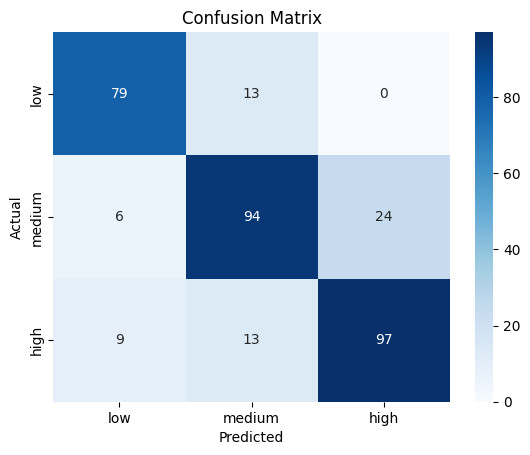

Kernel: linear
Cost: 1,Accuracy: 0.8149253731343283


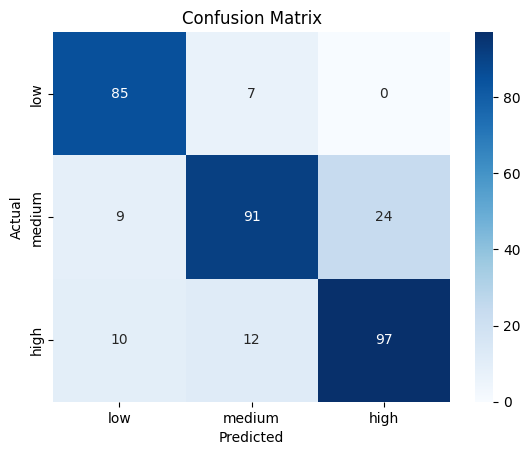

Kernel: linear
Cost: 10,Accuracy: 0.8119402985074626


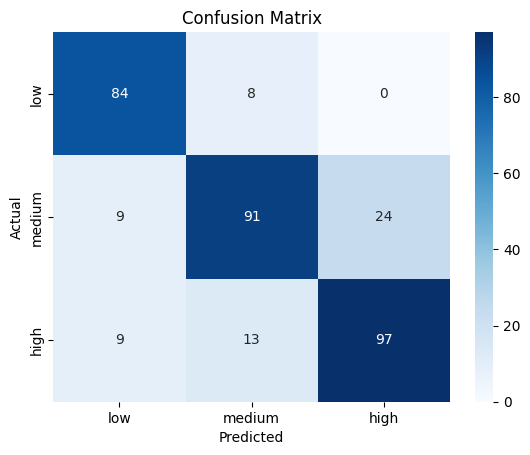

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the costs
costs = [0.1, 1, 10]

# Train and evaluate SVM classifiers
for cost in costs:
    svm_clf = SVC(kernel='linear', C=cost, gamma='scale', random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: linear")

    # ANSI escape codes for bold and green color in print (optional)
    bold = "\033[1m"
    green = "\033[32m"
    reset = "\033[0m"

    print(f"Cost: {cost},{bold}{green}Accuracy: {accuracy}{reset}")
    

    cm = confusion_matrix(y_test, svm_clf.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Confusion Matrix')
    plt.show()


### Build model part 2 ---> polynomial  Kernels with three different cost 





Kernel: polynomial
Cost: 0.1,Accuracy: 0.8059701492537313


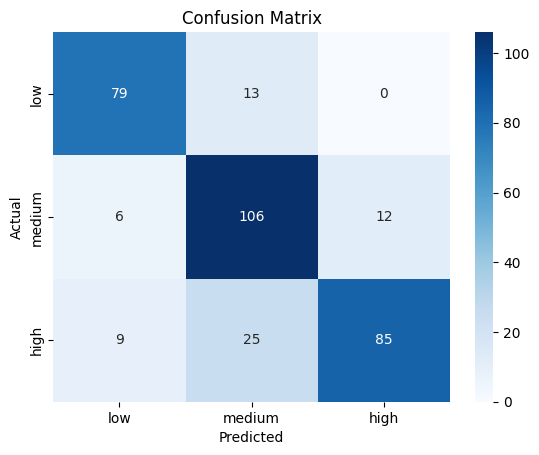

Kernel: polynomial
Cost: 1,Accuracy: 0.8119402985074626


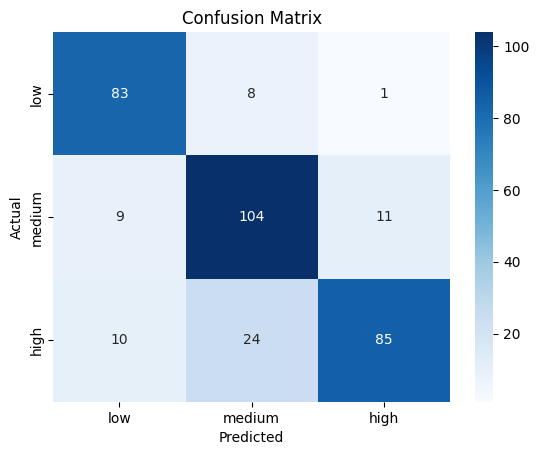

Kernel: polynomial
Cost: 10,Accuracy: 0.7970149253731343


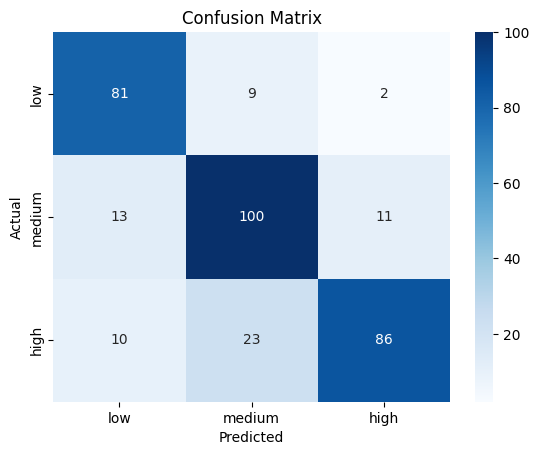

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the costs
costs = [0.1, 1, 10]

# Train and evaluate SVM classifiers
for cost in costs:
    svm_clf = SVC(kernel='poly', C=cost, gamma='scale', random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: polynomial")

    # ANSI escape codes for bold and green color in print (optional)
    bold = "\033[1m"
    green = "\033[32m"
    reset = "\033[0m"

    print(f"Cost: {cost},{bold}{green}Accuracy: {accuracy}{reset}")
    

    cm = confusion_matrix(y_test, svm_clf.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Confusion Matrix')
    plt.show()


### Build model part 3 ---> Radial Basis Function  Kernels with three different cost 





Kernel: RBF
Cost: 0.1,Accuracy: 0.7970149253731343


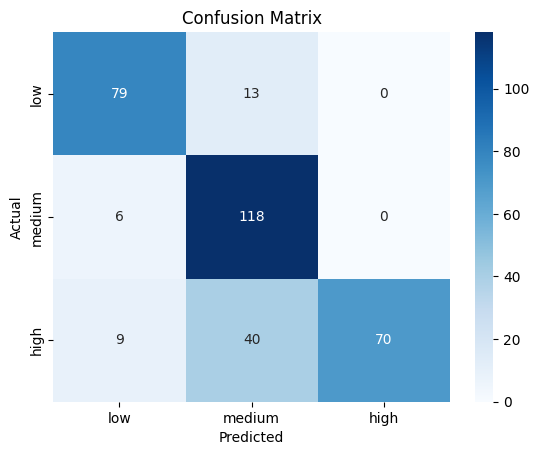

Kernel: RBF
Cost: 1,Accuracy: 0.8059701492537313


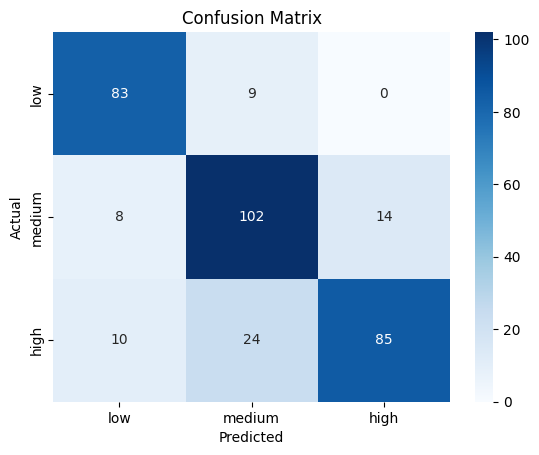

Kernel: RBF
Cost: 10,Accuracy: 0.8


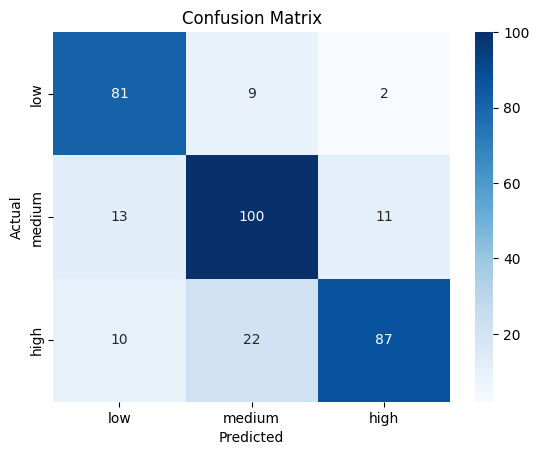

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the costs
costs = [0.1, 1, 10]

# Train and evaluate SVM classifiers
for cost in costs:
    svm_clf = SVC(kernel='rbf', C=cost, gamma='scale', random_state=42)
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: RBF")

    # ANSI escape codes for bold and green color in print (optional)
    bold = "\033[1m"
    green = "\033[32m"
    reset = "\033[0m"

    print(f"Cost: {cost},{bold}{green}Accuracy: {accuracy}{reset}")
    

    cm = confusion_matrix(y_test, svm_clf.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title('Confusion Matrix')
    plt.show()


## Step 5 --> optimizing the tree with pruning method

### optimizing part 1: Using hyper parameter tuning with cross-validation

Tuning both C and gamma is important to find the right balance between overfitting and underfitting, and to achieve the best generalization performance for your SVM model. GridSearchCV can be used to find the optimal values for these hyperparameters.

In [99]:
from sklearn.model_selection import GridSearchCV

# Define the SVM model with a kernel
svm_model = SVC()

# Define the parameters for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly','rbf']}

# Perform GridSearchCV
grid = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=

In [100]:
# Run the SVM model with the best parameters
best_svm_clf = grid.best_estimator_
best_svm_clf.fit(X_train, y_train)
y_pred = best_svm_clf.predict(X_test)

In [101]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy}")

Accuracy with best parameters: 0.8119402985074626


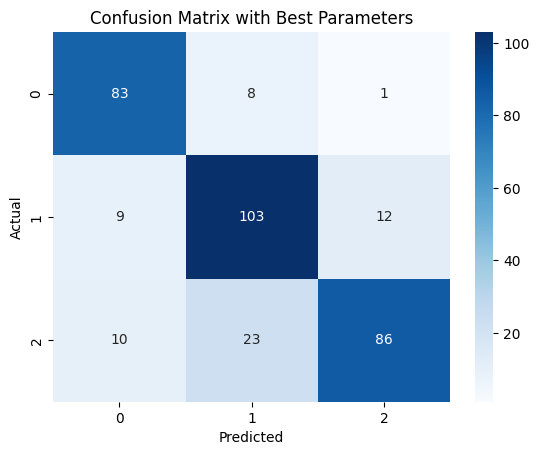

In [102]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with Best Parameters")
plt.show()

**Reuslt:**

*  Best parameters found by GridSearchCV: **{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}**, with an accuracy of 0.8119402985074626.



### optimizing part 2: Using PCA

In [122]:

from sklearn.decomposition import PCA


# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM model
clf = SVC(kernel='linear', C=10)
clf.fit(X_train_pca, y_train)




SVC(C=10, kernel='linear')

Accuracy with PCA: 0.382089552238806


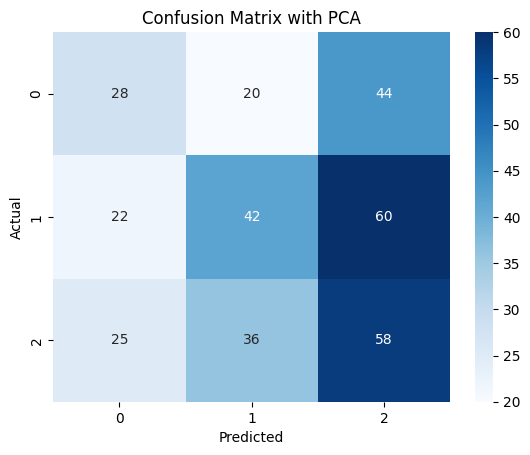

In [123]:
# Predict on the test set
y_pred_pca = clf.predict(X_test_pca)

# Calculate the accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy with PCA: {accuracy_pca}")

# Create the confusion matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot the confusion matrix
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix with PCA")
plt.show()

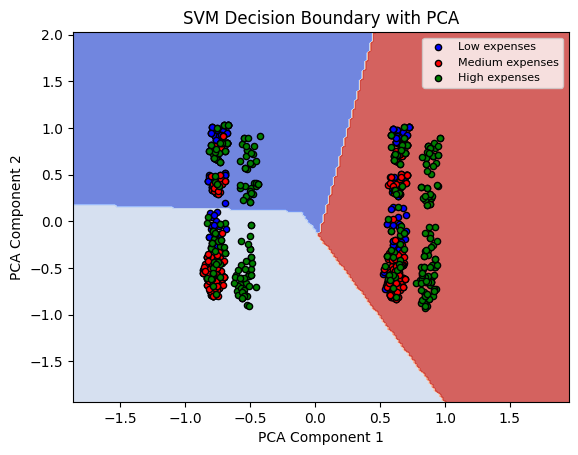

In [124]:
# Visualize the decision boundary
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Create a scatter plot for each class (low, medium, high)
low_expenses = plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='b', edgecolor='k', s=20)
medium_expenses = plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='r', edgecolor='k', s=20)
high_expenses = plt.scatter(X_train_pca[y_train == 2, 0], X_train_pca[y_train == 2, 1], color='g', edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title("SVM Decision Boundary with PCA")

# Add a legend
plt.legend((low_expenses, medium_expenses, high_expenses),
           ('Low expenses', 'Medium expenses', 'High expenses'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.show()


In [118]:
total_explained_variance = sum(pca.explained_variance_ratio_)
print("Total explained variance after PCA:", total_explained_variance)


Total explained variance after PCA: 0.235127763159866


The total explained variance after PCA of **0.2351 (23.51%)** is relatively low, which means that the two principal components used in this analysis only capture around 23.51% of the total variance in the dataset. In many cases, this might not be sufficient to accurately represent the original dataset. Ideally, you want to retain a higher percentage of the total variance, typically around 70-90% or more, depending on the specific problem and dataset.